In [1]:
import sys
sys.path.insert(0, '../../')

import joblib
import pandas as pd
import numpy as np

from pdpbox.info_plots import target_plot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## test regressor

In [2]:
test_ross = joblib.load('test_ross.pkl')

ross_data = test_ross['data']
ross_features = test_ross['features']
ross_target = test_ross['target']
ross_model = test_ross['rf_model']

## test actual plot

In [4]:
import sys
sys.path.insert(0, '../../')

from pdpbox.info_plots import actual_plot

#### binary feature

../../pdpbox\info_plots.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  info_df['actual_prediction'] = prediction


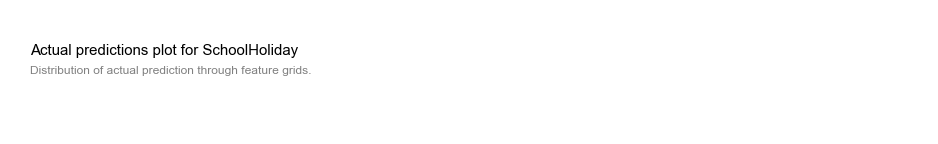

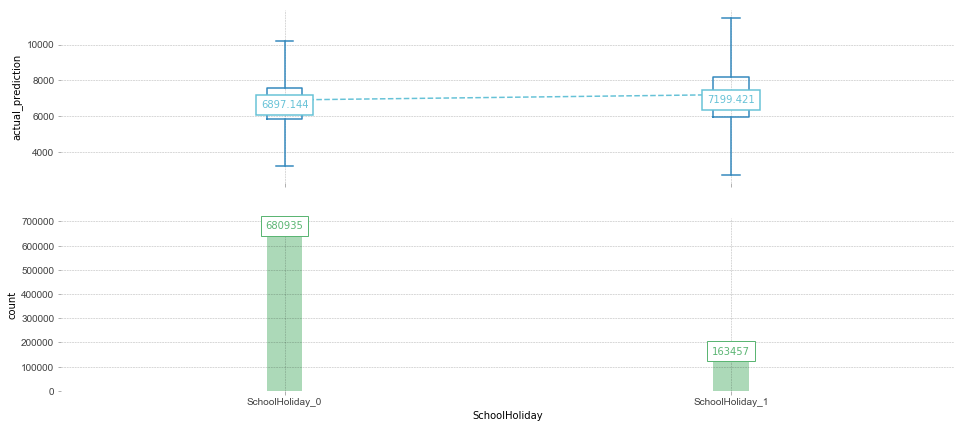

In [5]:
axes, df = actual_plot(model=ross_model, X=ross_data[ross_features], feature='SchoolHoliday', feature_name='SchoolHoliday')

In [6]:
df

,x,display_column,count,actual_prediction
0,0,SchoolHoliday_0,680935,6897.143815
1,1,SchoolHoliday_1,163457,7199.420879


In [7]:
axes

#### onehot encoding features

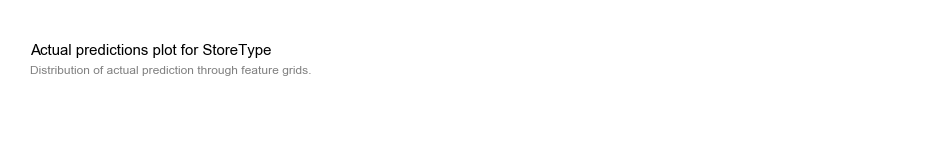

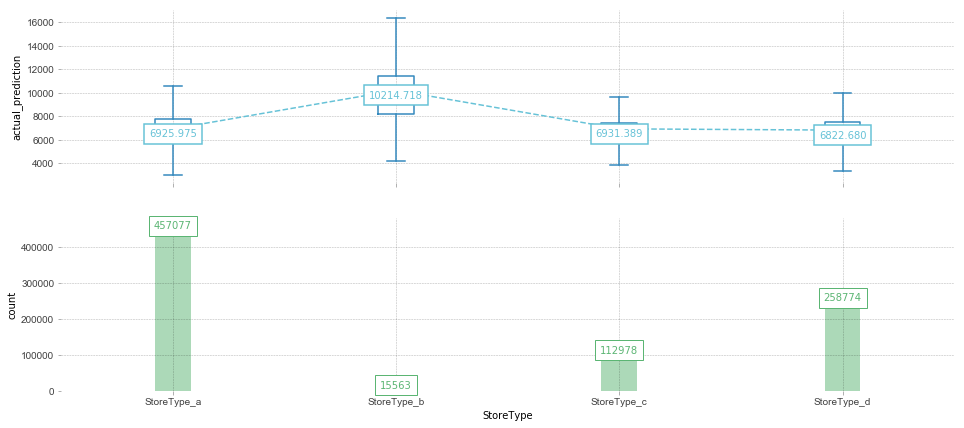

In [8]:
axes, df = actual_plot(model=ross_model, X=ross_data[ross_features], 
                       feature=['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'], feature_name='StoreType')

In [9]:
df

,x,display_column,count,actual_prediction
0,0,StoreType_a,457077,6925.975168
1,1,StoreType_b,15563,10214.718295
2,2,StoreType_c,112978,6931.389467
3,3,StoreType_d,258774,6822.680141


#### numeric feature

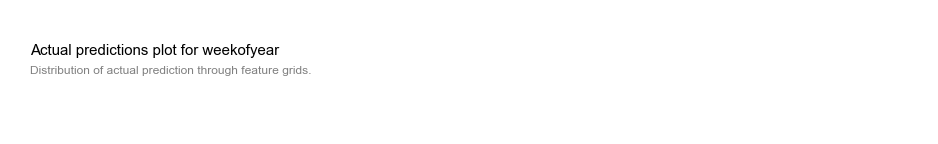

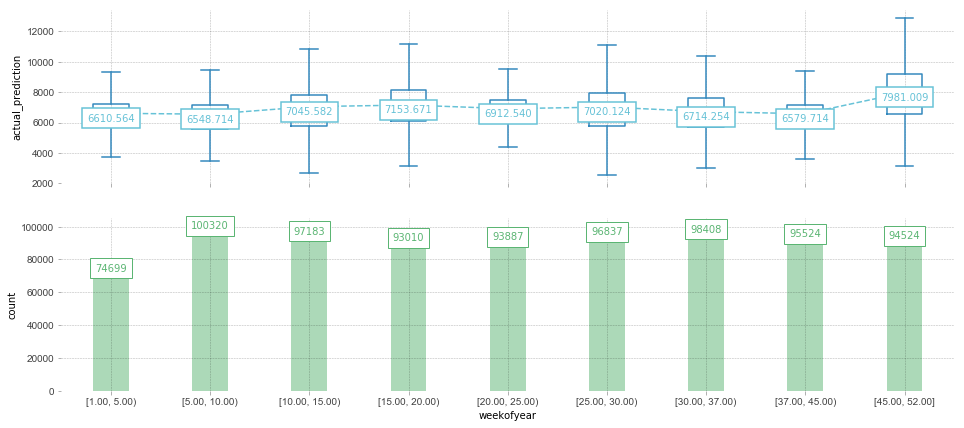

In [10]:
axes, df = actual_plot(model=ross_model, 
                       X=ross_data[ross_features], 
                       feature='weekofyear', 
                       feature_name='weekofyear', 
                       num_grid_points=10, 
                       grid_type='percentile', 
                       percentile_range=None, 
                       grid_range=None, 
                       cust_grid_points=None, 
                       show_percentile=False, 
                       show_outliers=False, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=None)

In [11]:
df

,x,display_column,count,actual_prediction
0,0,"[1.00, 5.00)",74699,6610.563896
1,1,"[5.00, 10.00)",100320,6548.714185
2,2,"[10.00, 15.00)",97183,7045.581781
3,3,"[15.00, 20.00)",93010,7153.670834
4,4,"[20.00, 25.00)",93887,6912.539577
5,5,"[25.00, 30.00)",96837,7020.124260
6,6,"[30.00, 37.00)",98408,6714.254112
7,7,"[37.00, 45.00)",95524,6579.713620
8,8,"[45.00, 52.00]",94524,7981.008905


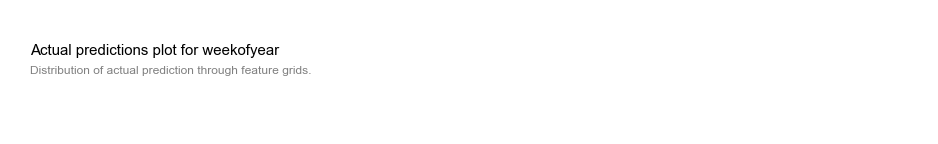

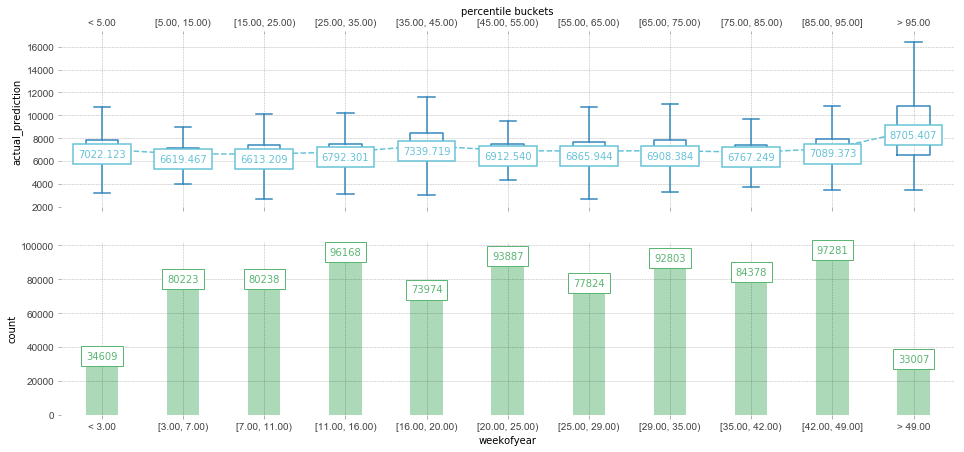

In [12]:
# show_percentile, percentile_range, show_outliers
axes, df = actual_plot(model=ross_model, 
                       X=ross_data[ross_features], 
                       feature='weekofyear', 
                       feature_name='weekofyear', 
                       num_grid_points=10, 
                       grid_type='percentile', 
                       percentile_range=(5, 95), 
                       grid_range=None, 
                       cust_grid_points=None, 
                       show_percentile=True, 
                       show_outliers=True, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=None)

In [13]:
df

,x,display_column,percentile_column,count,actual_prediction
0,0,< 3.00,< 5.00,34609,7022.122505
1,1,"[3.00, 7.00)","[5.00, 15.00)",80223,6619.467352
2,2,"[7.00, 11.00)","[15.00, 25.00)",80238,6613.209441
3,3,"[11.00, 16.00)","[25.00, 35.00)",96168,6792.301053
4,4,"[16.00, 20.00)","[35.00, 45.00)",73974,7339.718604
5,5,"[20.00, 25.00)","[45.00, 55.00)",93887,6912.539577
6,6,"[25.00, 29.00)","[55.00, 65.00)",77824,6865.943789
7,7,"[29.00, 35.00)","[65.00, 75.00)",92803,6908.384208
8,8,"[35.00, 42.00)","[75.00, 85.00)",84378,6767.248695
9,9,"[42.00, 49.00]","[85.00, 95.00]",97281,7089.372926


In [15]:
print df['count'].sum()
print ross_data.shape

844392
(844392, 29)


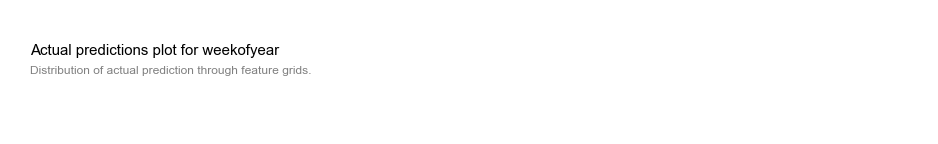

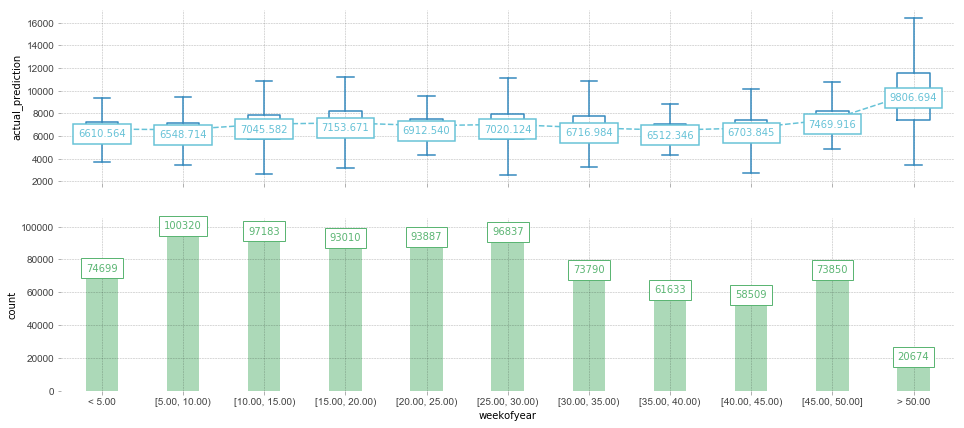

In [16]:
# grid_type, grid_range, show_outliers
axes, df = actual_plot(model=ross_model, 
                       X=ross_data[ross_features], 
                       feature='weekofyear', 
                       feature_name='weekofyear', 
                       num_grid_points=10, 
                       grid_type='equal', 
                       percentile_range=None, 
                       grid_range=(5, 50), 
                       cust_grid_points=None, 
                       show_percentile=False, 
                       show_outliers=True, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=None)

In [17]:
df

,x,display_column,count,actual_prediction
0,0,< 5.00,74699,6610.563896
1,1,"[5.00, 10.00)",100320,6548.714185
2,2,"[10.00, 15.00)",97183,7045.581781
3,3,"[15.00, 20.00)",93010,7153.670834
4,4,"[20.00, 25.00)",93887,6912.539577
5,5,"[25.00, 30.00)",96837,7020.124260
6,6,"[30.00, 35.00)",73790,6716.983550
7,7,"[35.00, 40.00)",61633,6512.345566
8,8,"[40.00, 45.00)",58509,6703.845085
9,9,"[45.00, 50.00]",73850,7469.915838


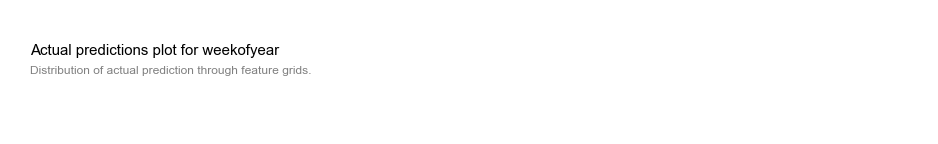

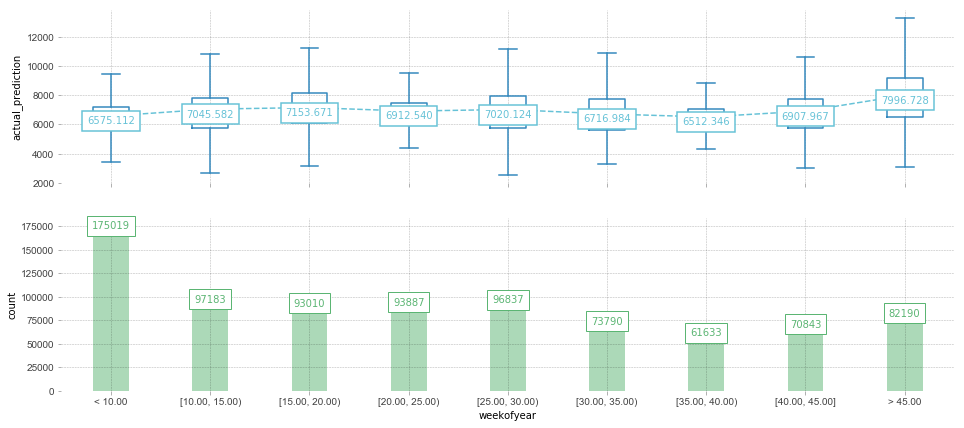

In [18]:
# cust_grid_points and show_outliers
axes, df = actual_plot(model=ross_model, 
                       X=ross_data[ross_features], 
                       feature='weekofyear', 
                       feature_name='weekofyear', 
                       num_grid_points=10, 
                       grid_type='percentile', 
                       percentile_range=None, 
                       grid_range=None, 
                       cust_grid_points=range(10, 50, 5), 
                       show_percentile=False, 
                       show_outliers=True, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=None)

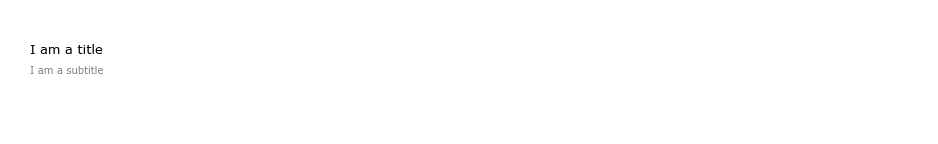

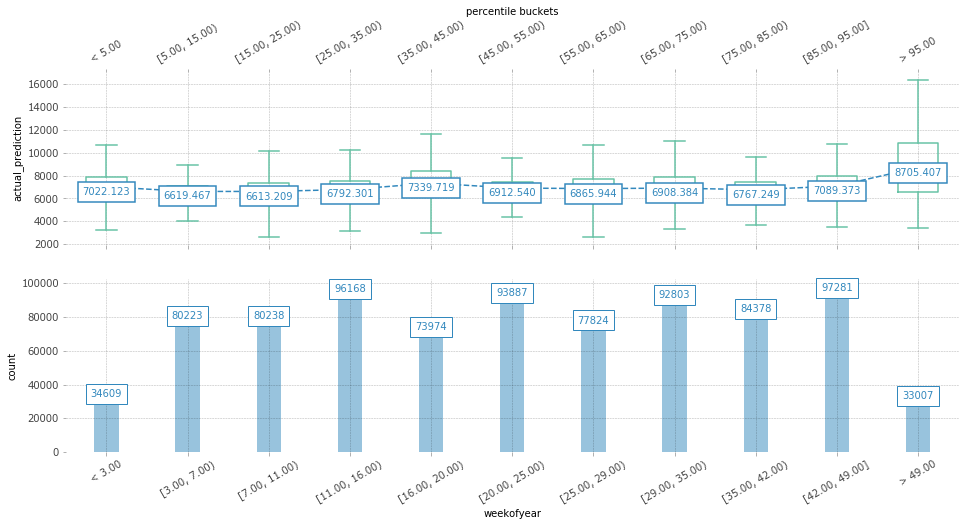

In [20]:
# plot_params
plot_params = {
    'font_family': 'Verdana',
    'xticks_rotation': 30,
    'title': 'I am a title',
    'subtitle': 'I am a subtitle',
    'title_fontsize': 13,
    'subtitle_fontsize': 10,
    'box_line_width': 1.5,
    'box_line_color': '#66c2a5',
    'box_color': '#3288bd',
    'box_width': 0.5,
    'bar_color': '#3288bd',
    'bar_width': 0.3
}

axes, df = actual_plot(model=ross_model, 
                       X=ross_data[ross_features], 
                       feature='weekofyear', 
                       feature_name='weekofyear', 
                       num_grid_points=10, 
                       grid_type='percentile', 
                       percentile_range=(5, 95), 
                       grid_range=None, 
                       cust_grid_points=None, 
                       show_percentile=True, 
                       show_outliers=True, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=plot_params)